## Michael Mente, 01634435 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np


## Baseline (istio load balancing, istio ingress gateway)

In [2]:
def make_plot(graf_req_sec: pd.DataFrame, graf_res:pd.DataFrame, graf_kbps:pd.DataFrame, locust_data:pd.DataFrame):
    fig, ax = plt.subplots(3, 2,  figsize=(20, 18))

    x = graf_req_sec["Time"]
    y = graf_req_sec["total requests"]

    ax[0,0].plot(range(0,len(x)),y)
    ax[0,0].set_title("Requests/sec over Time")
    ax[0,0].set_ylabel("Requests/sec")
    ax[0,0].set_xlabel("Second")
    ax[0,0].set_xticks(range(0,len(x)), range(0,len(x) * 5, 5), rotation=45)
    ax[0,0].xaxis.set_major_locator(ticker.MultipleLocator(5))

    
    def strip_ms(e):
        return float(e[:-3])
    
    y_col_name = "max(rate(istio_request_duration_milliseconds_count[5m]))"
    graf_res[y_col_name] = graf_res[y_col_name].apply(strip_ms)

    x = graf_res["Time"]
    y = graf_res[y_col_name]

    ax[1,0].plot(range(0,len(x)),y)
    ax[1,0].set_title("Response Time over Time")
    ax[1,0].set_ylabel("Response Time (ms)")
    ax[1,0].set_xlabel("Second")
    ax[1,0].set_xticks(range(0,len(x)), range(0,len(x) * 5, 5), rotation=45)
    ax[1,0].xaxis.set_major_locator(ticker.MultipleLocator(5))
    
    
    
    def strip_kbs(e):
        return float(e[:-5])
    
    y_col_name = list(graf_kbps.columns)[1]
    graf_kbps[y_col_name] = graf_kbps[y_col_name].apply(strip_kbs)

    x = graf_kbps["Time"]
    y = graf_kbps[y_col_name]

    ax[2,0].plot(range(0,len(x)),y)
    ax[2,0].set_title("transmitted Kilobytes over Time")
    ax[2,0].set_ylabel("kB/s")
    ax[2,0].set_xlabel("Second")
    ax[2,0].set_xticks(range(0,len(x)), range(0,len(x) * 5, 5), rotation=45)
    ax[2,0].xaxis.set_major_locator(ticker.MultipleLocator(5))
    
    
    locust_data = locust_data[locust_data['Type'].str.contains("GET", na=False)]
#    locust_data = locust_data.loc[locust_data['Type'] == "GET"]

    x = locust_data["Timestamp"]
    y = locust_data["Requests/s"]

    ax[0,1].plot(range(0,len(x)),y)
    ax[0,1].set_title("Requests/sec over Time")
    ax[0,1].set_ylabel("Requests/sec")
    ax[0,1].set_xlabel("Second")
    ax[0,1].set_xticks(range(0,len(x)), range(0,len(x)), rotation=45)
    ax[0,1].xaxis.set_major_locator(ticker.MultipleLocator(25))
    ###

    x = locust_data["Timestamp"]
    #y = np.diff(df["Total Average Response Time"], prepend=0)
    #y = df["Total Average Response Time"] / df["Total Request Count"]
    y = locust_data["Total Average Response Time"]
    #y = df["Total Median Response Time"]

    ax[1,1].plot(range(0,len(x)),y)
    ax[1,1].set_title("Total Average Response Time over Time")
    ax[1,1].set_ylabel("Response Time (ms)")
    ax[1,1].set_xlabel("Second")
    ax[1,1].set_xticks(range(0,len(x)), range(0,len(x)), rotation=45)
    ax[1,1].xaxis.set_major_locator(ticker.MultipleLocator(25))
    ###

    x = locust_data["Timestamp"]
    y = locust_data["Total Average Content Size"]

    ax[2,1].plot(range(0,len(x)),y)
    ax[2,1].set_title("Total Average Content Size")
    ax[2,1].set_ylabel("kB")
    ax[2,1].set_xlabel("Second")
    ax[2,1].set_xticks(range(0,len(x)), range(0,len(x)), rotation=45)
    ax[2,1].xaxis.set_major_locator(ticker.MultipleLocator(25))
    
    
    plt.show()

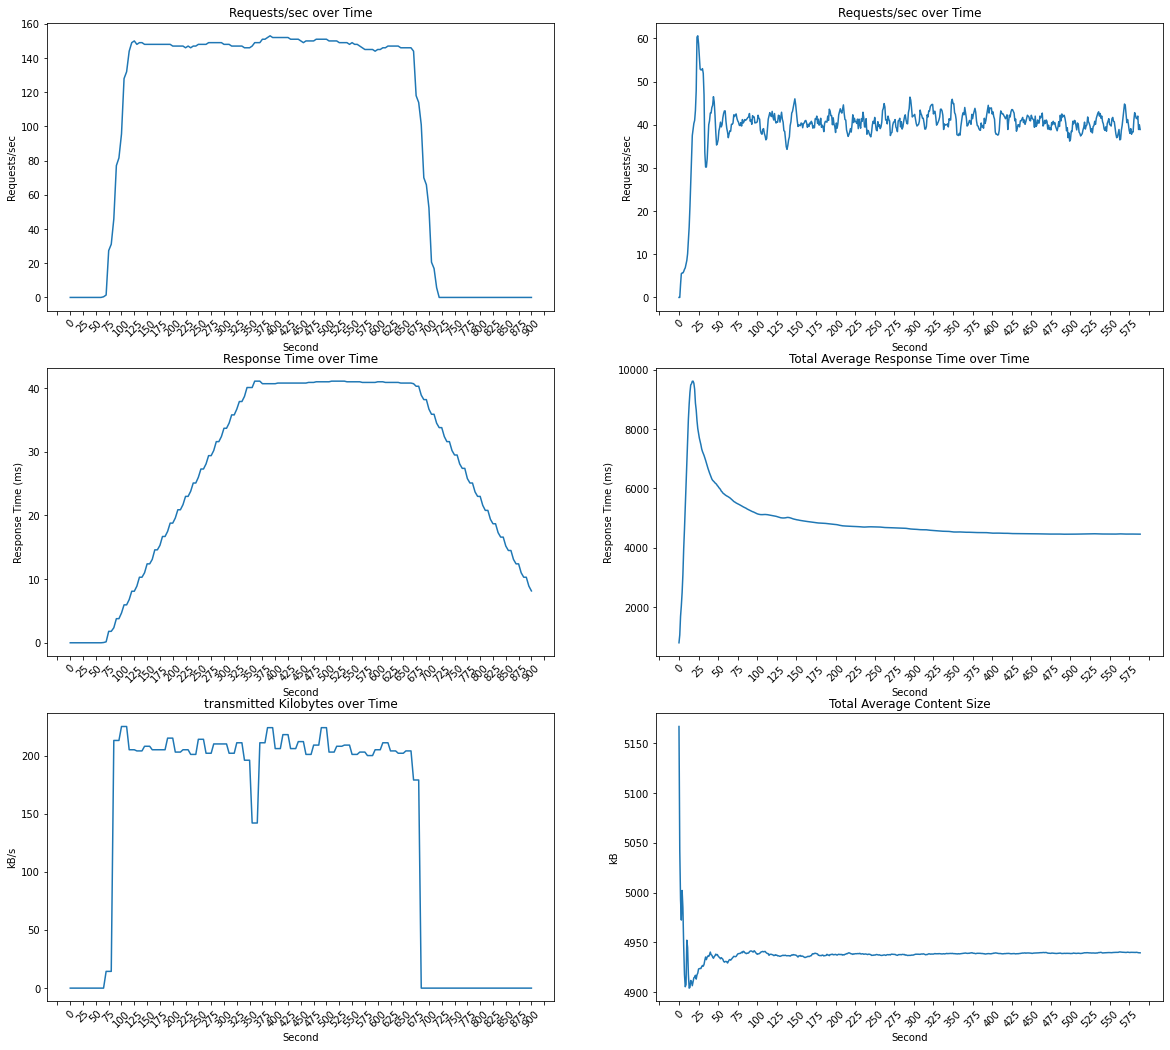

In [4]:
folder = "./../benchmarks/baseline/"
graf_req_sec = pd.read_csv(folder + "Requests_second-data-2022-07-01 15_27_27.csv")
graf_res = pd.read_csv(folder + "Response time-data-2022-07-01 15_27_46.csv")
graf_kbps = pd.read_csv(folder + "Total bytes _ sec-data-2022-07-01 15_27_54.csv")
locust_data = pd.read_csv(folder + "01-07-22_15-10-58_stats_history.csv")


make_plot(graf_req_sec, graf_res, graf_kbps, locust_data)

___

## no Ingress Gateway 

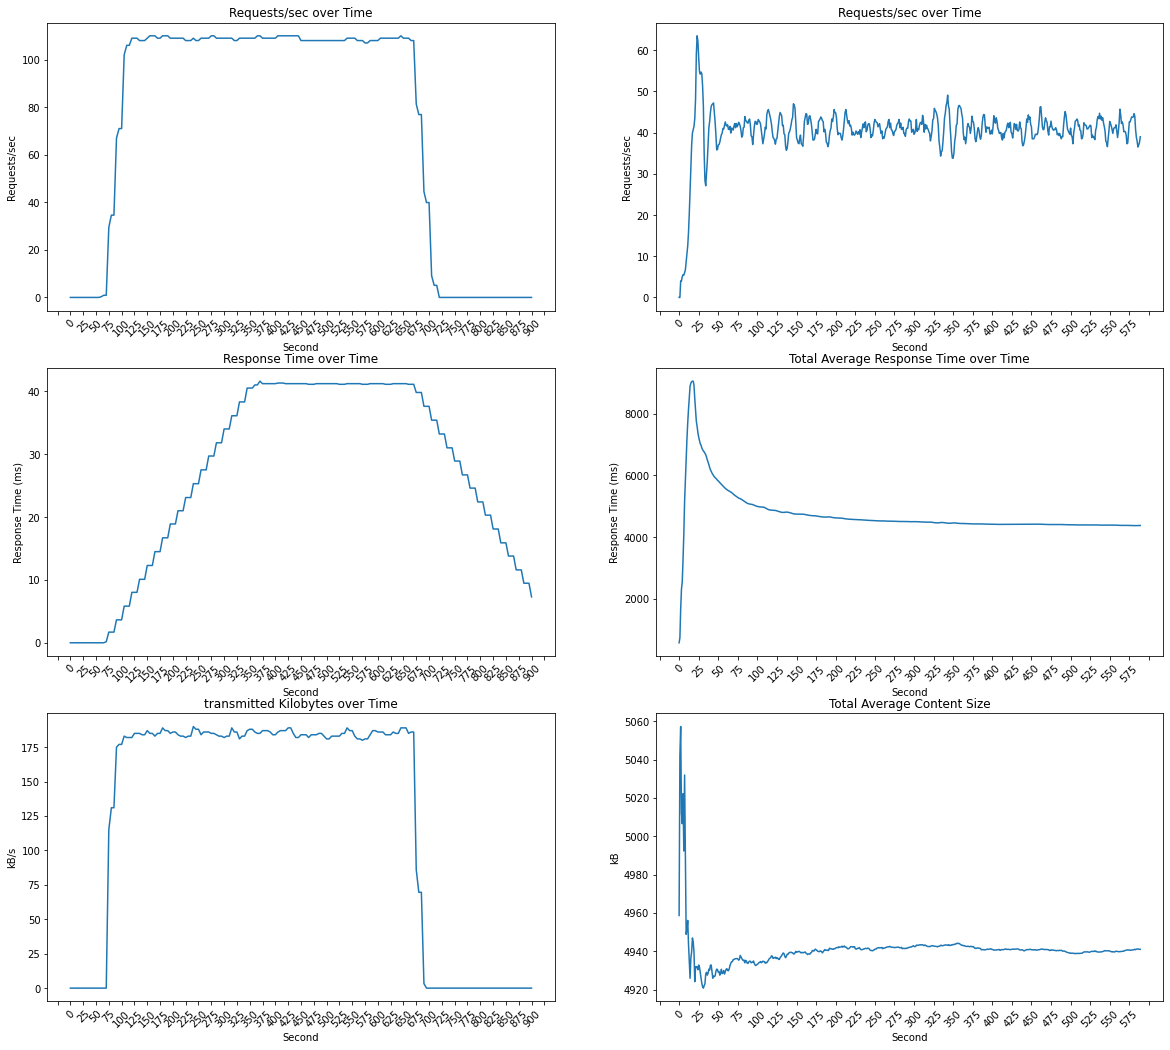

In [13]:
folder = "./../benchmarks/noIngressGateway/"
graf_req_sec = pd.read_csv(folder + "Requests_second-data-2022-07-01 16_12_11.csv")
graf_res = pd.read_csv(folder + "Response time-data-2022-07-01 16_12_27.csv")
graf_kbps = pd.read_csv(folder + "Total bytes _ sec-data-2022-07-01 16_12_18.csv")
locust_data = pd.read_csv(folder + "01-07-22_15-57-57_stats_history.csv")


make_plot(graf_req_sec, graf_res, graf_kbps, locust_data)

___

## no Load Balancing

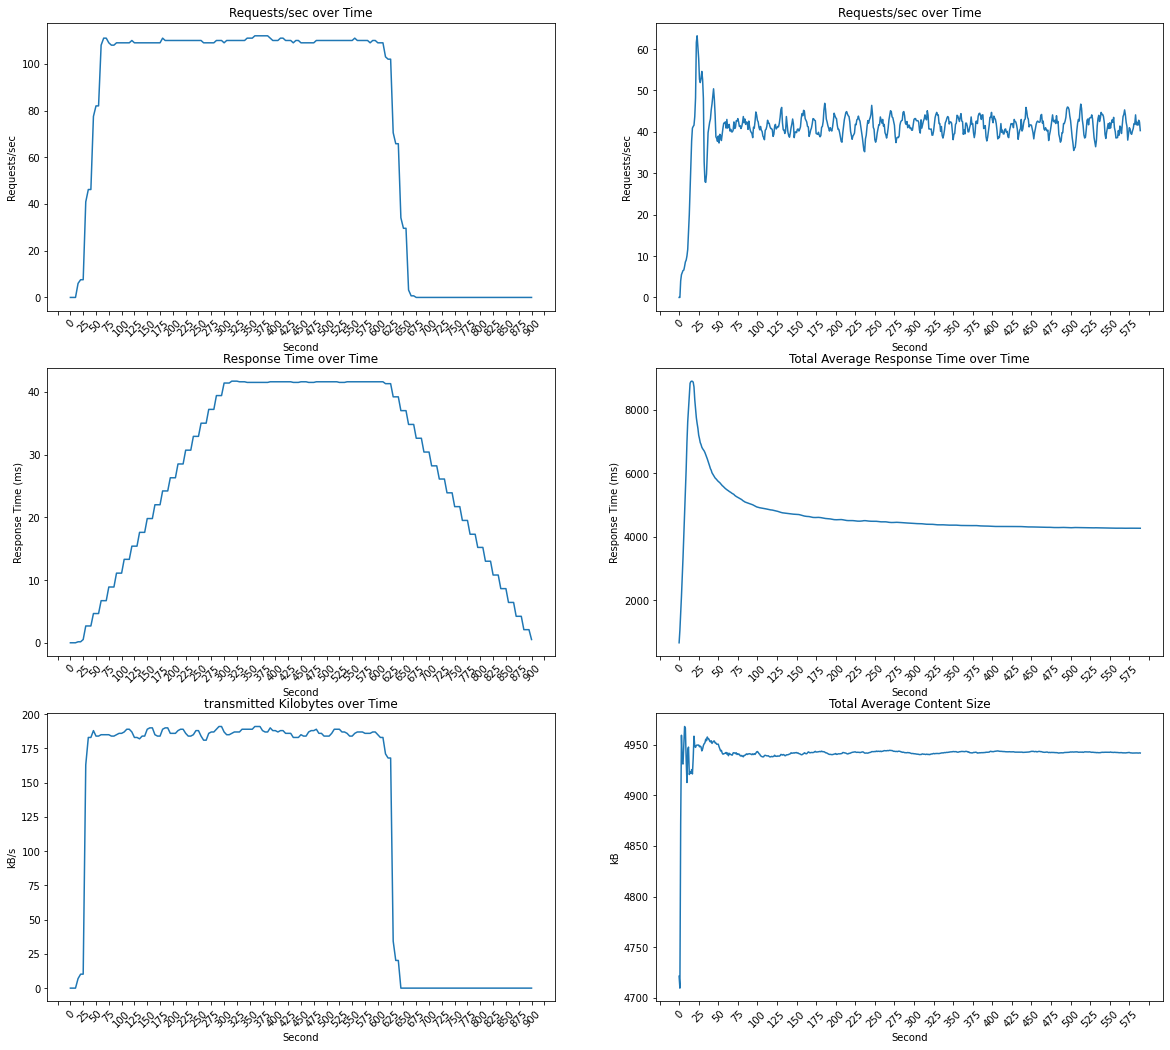

In [15]:
folder = "./../benchmarks/noLoadBalancing/"
graf_req_sec = pd.read_csv(folder + "Requests_second-data-2022-07-01 16_58_04.csv")
graf_res = pd.read_csv(folder + "Response time-data-2022-07-01 16_58_26.csv")
graf_kbps = pd.read_csv(folder + "Total bytes _ sec-data-2022-07-01 16_58_41.csv")
locust_data = pd.read_csv(folder + "01-07-22_16-43-08_stats_history.csv")

make_plot(graf_req_sec, graf_res, graf_kbps, locust_data)

___

# Comparison

In [17]:
summary_file_names = [
    "./../benchmarks/baseline/01-07-22_15-10-58_stats_history.csv",
    "./../benchmarks/noLoadBalancing/01-07-22_16-43-08_stats_history.csv",
    "./../benchmarks/noIngressGateway/01-07-22_15-57-57_stats_history.csv",
]
summary_names = ["Baseline","no Load Balancing", "no Ingress Gateway"]

cols_of_interest = ["Total Average Response Time", "Requests/s"]
col_names = ["Total Average Response Time (ms)", "Requests/s"]
cols = dict(zip(cols_of_interest, col_names))


summaries = {}

for col_key, col_name in cols.items():
    summaries[col_key] = {}
    for name, file_name in zip(summary_names, summary_file_names):
        temp = pd.read_csv(file_name)
        temp = temp[temp['Type'].str.contains("GET", na=False)][col_key]
        summaries[col_key][name] = temp
#        summaries[col_key][name] = temp[temp['Type'].str.contains("GET", na=False)][col_key]
#        locust_data = locust_data[locust_data['Type'].str.contains("GET", na=False)]
#        print(len(temp))


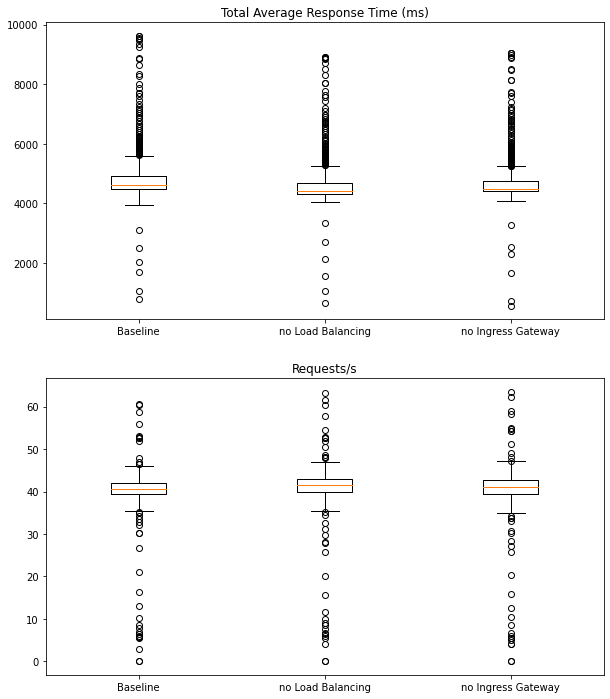

In [18]:
fig, ax = plt.subplots(len(cols_of_interest), figsize=(10, 12))

for i, (col_key, col_name) in enumerate(cols.items()):
    ax[i].boxplot(summaries[col_key].values(), showfliers=True)
    ax[i].set_title(col_name)
    ax[i].set_xticklabels(summaries[col_key].keys())

In [19]:
total_request_count = {}
print("Total request count:")
for name, file_name in zip(summary_names, summary_file_names):
    temp = pd.read_csv(file_name)
    count = max(temp[temp['Type'].str.contains("GET", na=False)]["Total Request Count"])
    total_request_count[name] = count
    print("\t",name, ":", count)


Total request count:
	 Baseline : 23898
	 no Load Balancing : 24391
	 no Ingress Gateway : 24199


___

### Distribution & Correlation Response time vs Requests/s

In [20]:
scatter_data = {}
for name, file_name in zip(summary_names, summary_file_names):
    temp = pd.read_csv(file_name)
    temp = temp.loc[temp['Type'] == "GET"]
    #temp = temp[temp['Type'].str.contains("GET", na=False)]

    scatter_data[name] = temp #[cols_of_interest]



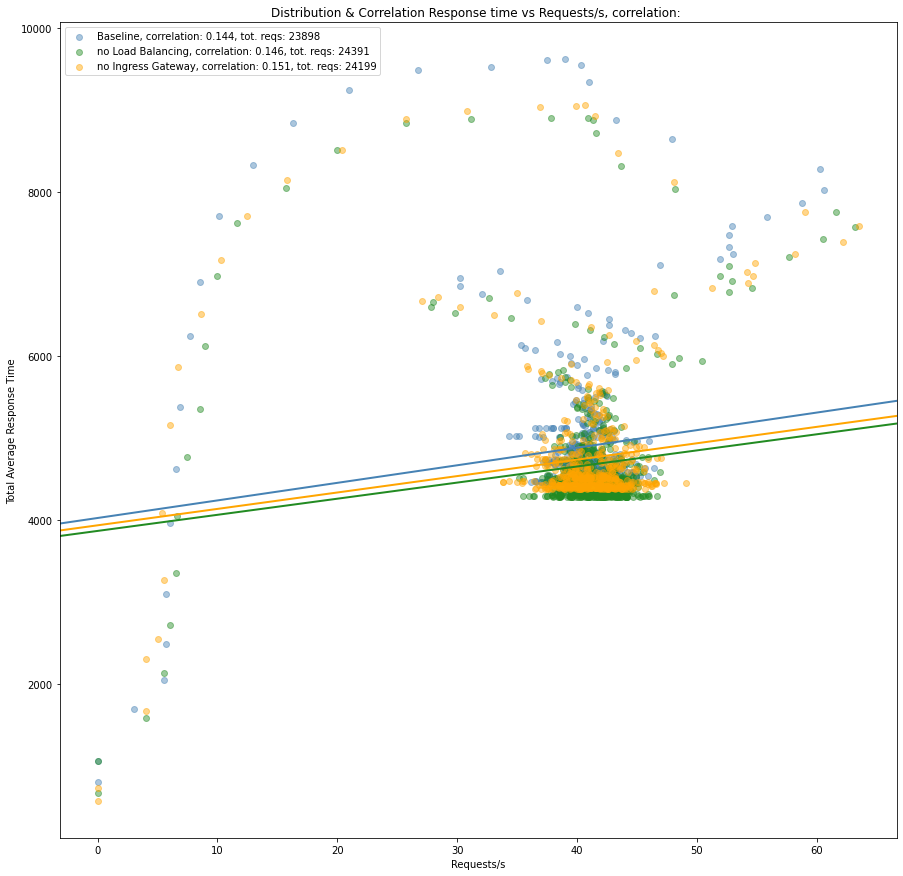

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
colors = ['steelblue','forestgreen','orange']

for name, file_name, color in zip(summary_names, summary_file_names, colors):
    x = scatter_data[name][cols_of_interest[1]]
    y = scatter_data[name][cols_of_interest[0]]
    
    cor = scatter_data[name][cols_of_interest[0]].corr(scatter_data[name][cols_of_interest[1]])
    
    m, b = np.polyfit(x, y, 1)
    
    ax.scatter(x, y, alpha=0.45, label=name + ", correlation: " + str(round(cor,3)) + ", tot. reqs: " + str(total_request_count[name]), c=color)
    plt.axline(xy1=(0, b), slope=m, linewidth=2, c=color)

    
    ax.set_xlabel(cols_of_interest[1])
    ax.set_ylabel(cols_of_interest[0])
    
ax.set_title("Distribution & Correlation Response time vs Requests/s" + ", correlation: ")
plt.legend()

plt.show()